In [18]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('../dataset/AirPassengers.csv')
df = df.rename(columns={'#Passengers' : 'y', 'Month' : 'ds'})
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
df['y_orig'] = df['y']
df.head()

,ds,y,y_orig
0,1949-01,112,112
1,1949-02,118,118
2,1949-03,132,132
3,1949-04,129,129
4,1949-05,121,121


In [21]:
df['y'] = np.log(df['y'])
df.head()

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [22]:
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(df)

11:01:13 - cmdstanpy - INFO - Chain [1] start processing
11:01:13 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future_data = model.make_future_dataframe(periods=12, freq='M')

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [24]:
forecast_data = model.predict(future_data)
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice Day,Armistice Day_lower,Armistice Day_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,4.805902,4.667225,4.755500,4.805902,4.805902,0.0,0.0,0.0,0.0,...,-0.047516,-0.047516,-0.047516,-0.046013,-0.046013,-0.046013,0.0,0.0,0.0,4.712373
1,1949-02-01,4.811465,4.662056,4.750236,4.811465,4.811465,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.104821,-0.104821,-0.104821,0.0,0.0,0.0,4.706644
2,1949-03-01,4.816489,4.789265,4.878113,4.816489,4.816489,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.017753,0.017753,0.017753,0.0,0.0,0.0,4.834243
3,1949-04-01,4.822052,4.768428,4.862498,4.822052,4.822052,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.006683,-0.006683,-0.006683,0.0,0.0,0.0,4.815369
4,1949-05-01,4.827436,4.766680,4.858855,4.827436,4.827436,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.013245,-0.013245,-0.013245,0.0,0.0,0.0,4.814190


In [25]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,4.712373,4.667225,4.755500
1,1949-02-01,4.706644,4.662056,4.750236
2,1949-03-01,4.834243,4.789265,4.878113
3,1949-04-01,4.815369,4.768428,4.862498
4,1949-05-01,4.814190,4.766680,4.858855


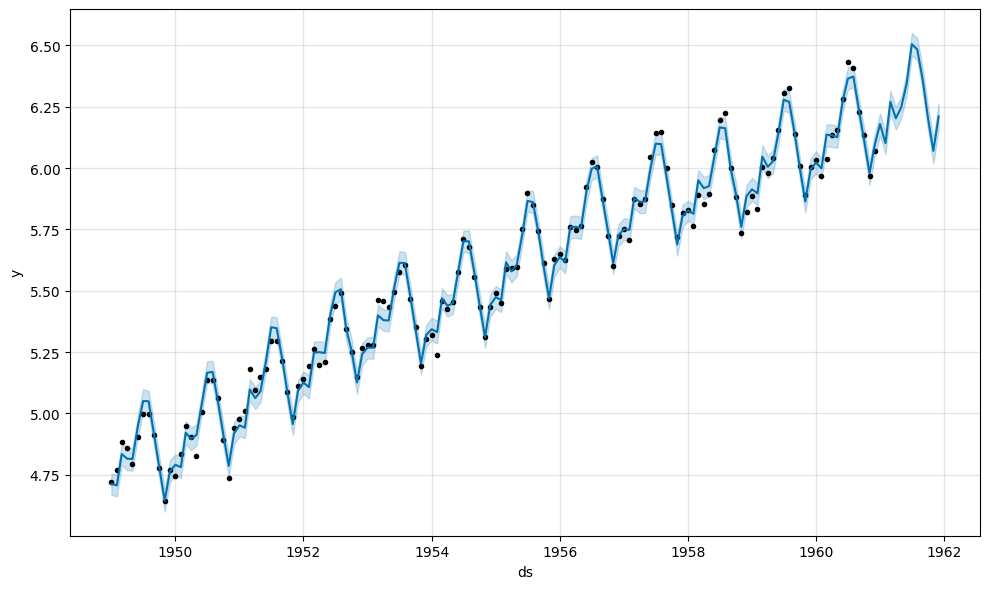

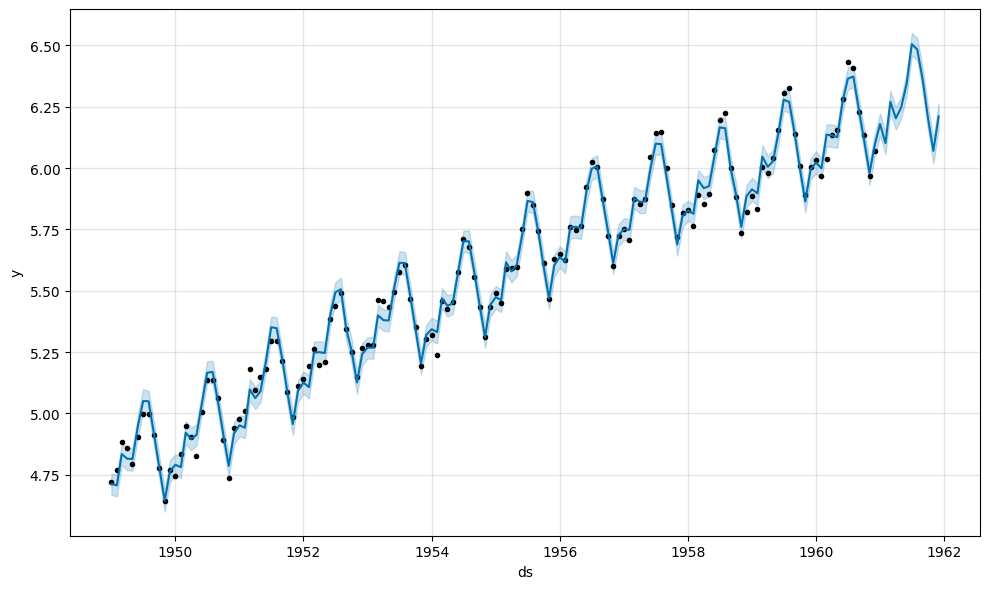

In [26]:
model.plot(forecast_data)

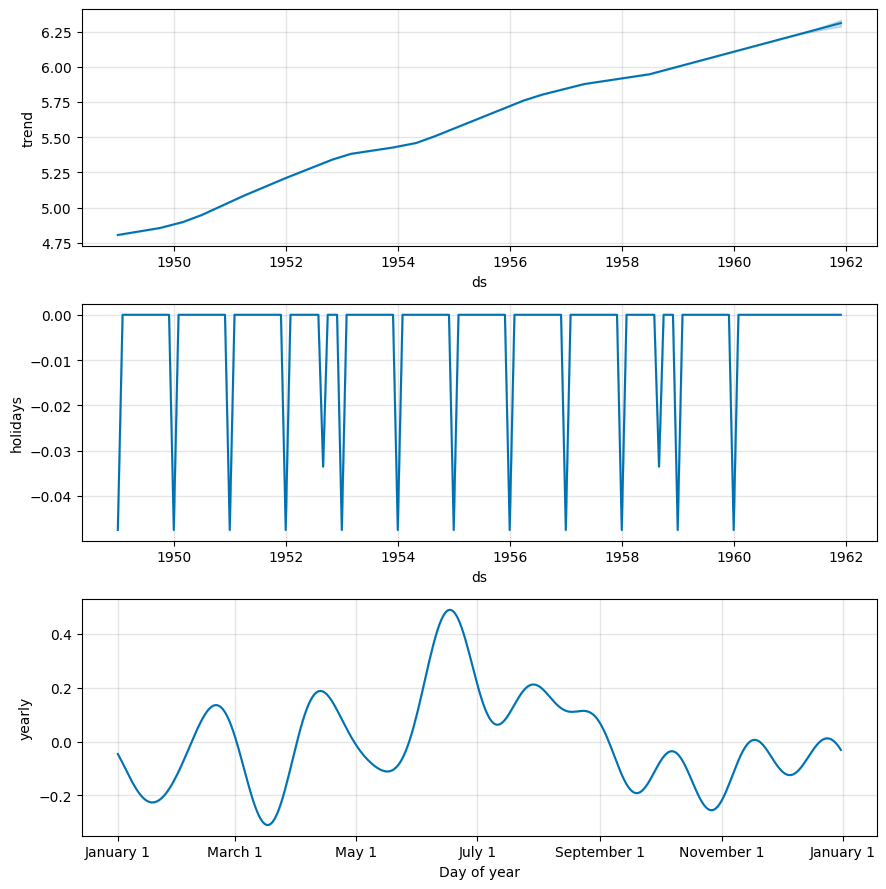

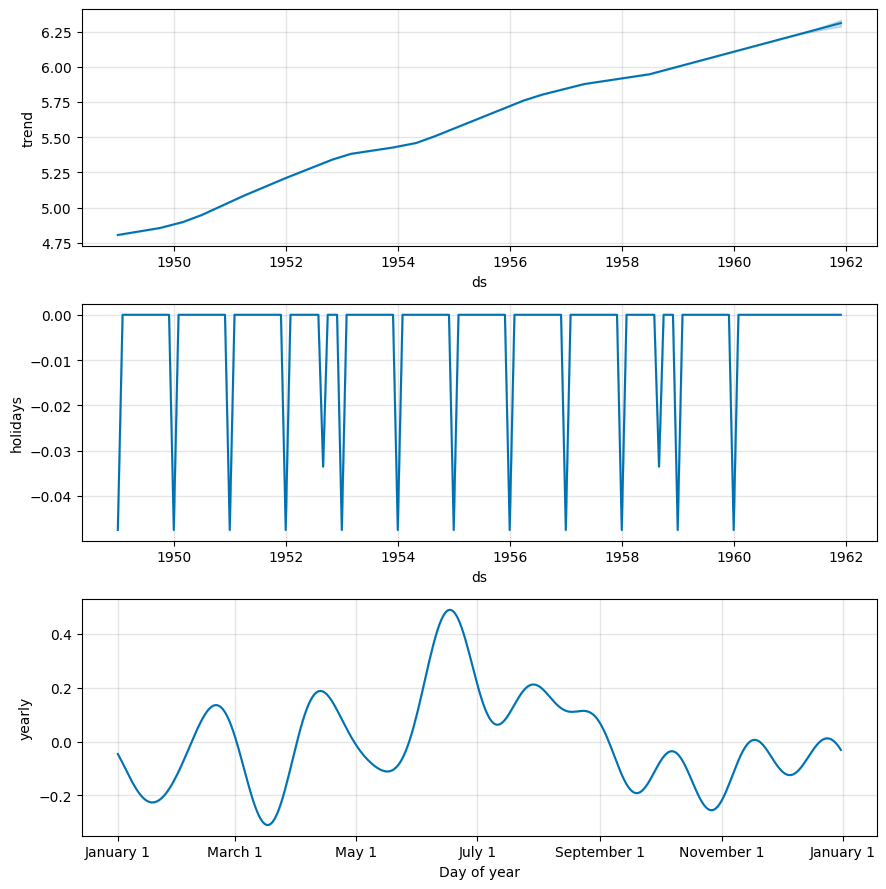

In [27]:
model.plot_components(forecast_data)

In [28]:
forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

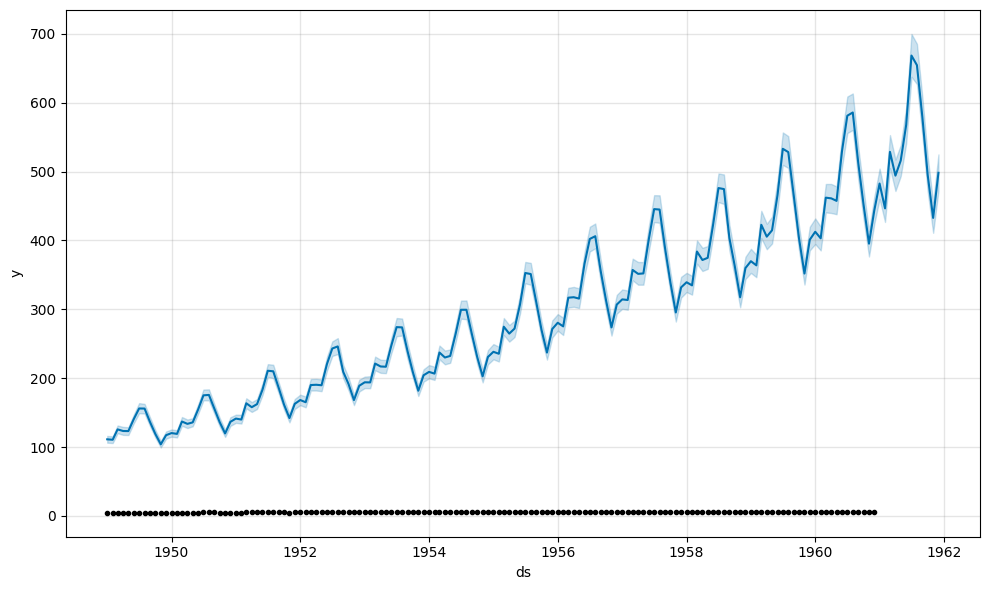

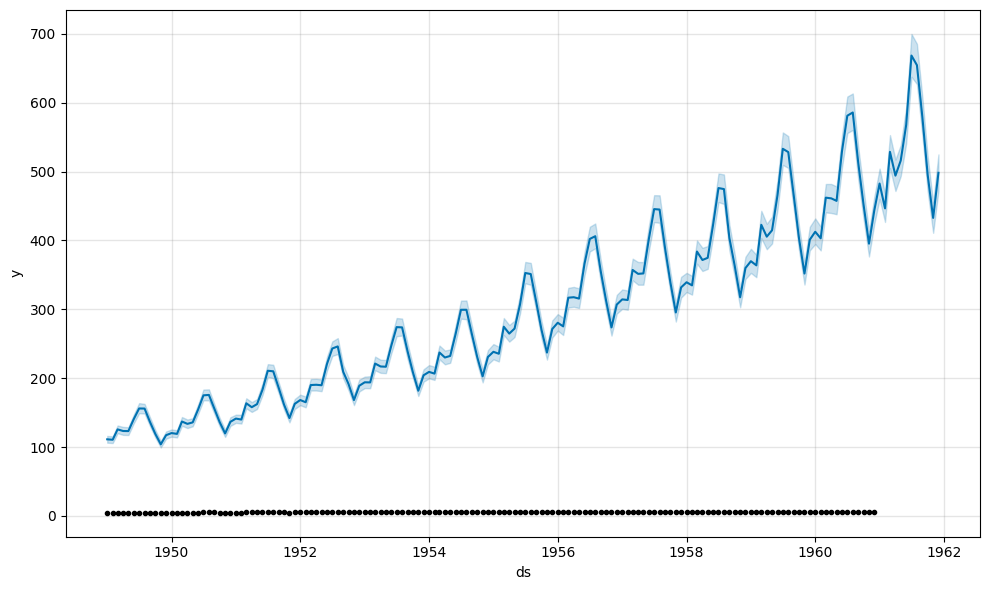

In [29]:
model.plot(forecast_data_orig)

In [30]:
df['y_log'] = df['y']
df['y'] = df['y_orig']
df.head()

,ds,y,y_orig,y_log
0,1949-01,112,112,4.718499
1,1949-02,118,118,4.770685
2,1949-03,132,132,4.882802
3,1949-04,129,129,4.859812
4,1949-05,121,121,4.795791
